In [10]:
from keras import layers,models,metrics
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical # replace one hot

In [32]:
(x_train,y_train),(x_test,y_test)=reuters.load_data(num_words=10000)

In [33]:
len(x_train)

8982

In [36]:
def onehot(seqs,dimention=10000): # can be replaced with to categorrical
                                #in the labels
    res =np.zeros((len(seqs),dimention))
    for i,seq in enumerate (seqs):
        res[i,seq]=1
    return res

In [37]:
x_train=onehot(x_train)
x_test=onehot(x_test)

In [38]:
y_test=to_categorical(y_test)
y_train=to_categorical(y_train)

In [39]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [40]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [41]:
x_val=x_train[:1000]
y_val=y_train[:1000]
x_train=x_train[1000:]
y_train=y_train[1000:]

In [42]:
history=model.fit(x_train,y_train,epochs=20,batch_size=512,
                  validation_data=[x_val,y_val])

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 205us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 146us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 144us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 146us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 145us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 146us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 147us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020


In [43]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [46]:
epochs=range(1,len(history.history['loss'])+1)


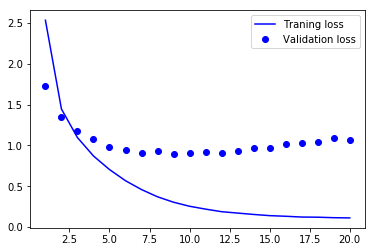

In [48]:
plt.plot(epochs,history.history['loss'],'b',label='Traning loss')
plt.plot(epochs,history.history['val_loss'],'bo',label='Validation loss')
plt.legend()
plt.show()

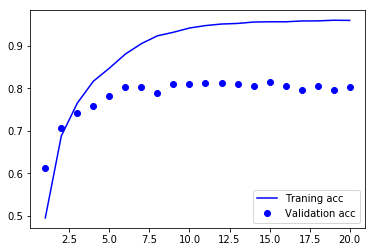

In [49]:
plt.plot(epochs,history.history['acc'],'b',label='Traning acc')
plt.plot(epochs,history.history['val_acc'],'bo',label='Validation acc')
plt.legend()
plt.show()

## Overfitting detected ! aftre the 9th epochs
## retrain with epochs=9

In [52]:
history=model.fit(x_train,y_train,epochs=7,batch_size=512,
                  validation_data=[x_val,y_val])

Train on 7982 samples, validate on 1000 samples
Epoch 1/7
7982/7982 [==============================] - 1s 146us/step - loss: 0.0925 - acc: 0.9582 - val_loss: 1.2254 - val_acc: 0.7930
Epoch 2/7
7982/7982 [==============================] - 1s 145us/step - loss: 0.0914 - acc: 0.9573 - val_loss: 1.2453 - val_acc: 0.7770
Epoch 3/7
7982/7982 [==============================] - 1s 145us/step - loss: 0.0906 - acc: 0.9579 - val_loss: 1.1826 - val_acc: 0.7950
Epoch 4/7
7982/7982 [==============================] - 1s 145us/step - loss: 0.0902 - acc: 0.9580 - val_loss: 1.2582 - val_acc: 0.7710
Epoch 5/7
7982/7982 [==============================] - 1s 144us/step - loss: 0.0900 - acc: 0.9569 - val_loss: 1.2709 - val_acc: 0.7820
Epoch 6/7
7982/7982 [==============================] - 1s 144us/step - loss: 0.0889 - acc: 0.9603 - val_loss: 1.2352 - val_acc: 0.8030
Epoch 7/7
7982/7982 [==============================] - 1s 144us/step - loss: 0.0859 - acc: 0.9594 - val_loss: 1.3125 - val_acc: 0.7830


In [54]:
epochs=range(1,len(history.history['loss'])+1)


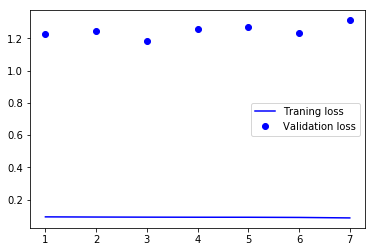

In [55]:
plt.plot(epochs,history.history['loss'],'b',label='Traning loss')
plt.plot(epochs,history.history['val_loss'],'bo',label='Validation loss')
plt.legend()
plt.show()

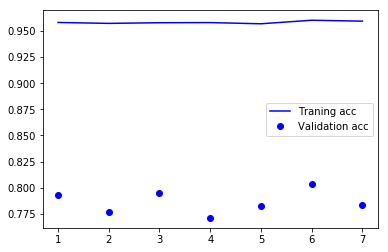

In [56]:
plt.plot(epochs,history.history['acc'],'b',label='Traning acc')
plt.plot(epochs,history.history['val_acc'],'bo',label='Validation acc')
plt.legend()
plt.show()

In [59]:
prediction=model.predict(x_test)

In [60]:
np.sum(prediction[0])

1.0

In [61]:
np.argmax(prediction[4])

13